In [59]:
#Import necessary libraries
import os
from google.colab import drive

#Mount Google Drive
drive.mount('/content/drive')

#Set dataset path
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV-RGBT-Processed'

#Check if path exists
if not os.path.exists(dataset_path):
    print("Error: Dataset path does not exist! Please check the path setting.")
else:
    print("Dataset path exists, checking file structure...")

    # List files and subdirectories in dataset directory
    for root, dirs, files in os.walk(dataset_path):
        print(f"Directory: {root}")
        print(f"Subdirectories: {dirs}")
        print(f"Files: {files[:10]}")  #Show only first 10 files to avoid excessive output
        print("-" * 50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset path exists, checking file structure...
Directory: /content/drive/MyDrive/模型训练/Anti-UAV-RGBT-Processed
Subdirectories: ['images', 'labels']
Files: ['data.yaml']
--------------------------------------------------
Directory: /content/drive/MyDrive/模型训练/Anti-UAV-RGBT-Processed/images
Subdirectories: ['train', 'test', 'val']
Files: []
--------------------------------------------------
Directory: /content/drive/MyDrive/模型训练/Anti-UAV-RGBT-Processed/images/train
Subdirectories: []
Files: ['20190925_133630_1_2_visibleI0814.jpg', '20190925_133630_1_2_visibleI0920.jpg', '20190925_133630_1_3_visibleI0082.jpg', '20190925_133630_1_3_visibleI0102.jpg', '20190925_133630_1_2_visibleI0907.jpg', '20190925_133630_1_2_visibleI0981.jpg', '20190925_133630_1_2_visibleI0995.jpg', '20190925_133630_1_3_visibleI0073.jpg', '20190925_133630_1_2_visibleI0935.jpg', '20190925_133630

In [2]:
#Install necessary dependencies
import os
import sys

#Update pip to the latest version
!{sys.executable} -m pip install --upgrade pip

#Install ultralytics library (includes YOLOv8)
!pip install ultralytics

#Install OpenCV and related libraries
!pip install opencv-python opencv-python-headless

# Verify installation
try:
    import ultralytics
    import cv2
    print("Success: ultralytics and OpenCV are installed correctly.")
    print(f"ultralytics version: {ultralytics.__version__}")
    print(f"OpenCV version: {cv2.__version__}")
except ImportError as e:
    print(f"Error: Failed to import required libraries. {str(e)}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 164.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 186.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 148.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 158.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 

Number of images: 19349
Number of labels: 19349
All images have corresponding labels.
Visualizing: 20190925_101846_1_1_visibleI0000.jpg


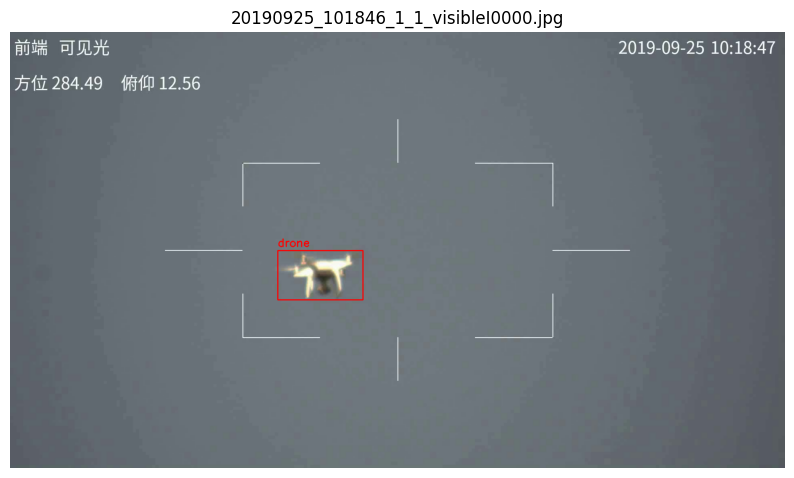

Visualizing: 20190925_101846_1_1_visibleI0001.jpg


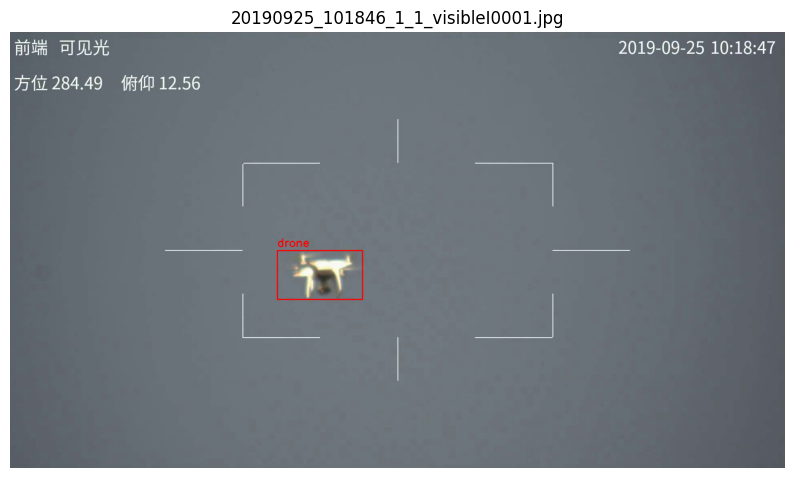

Visualizing: 20190925_101846_1_1_visibleI0002.jpg


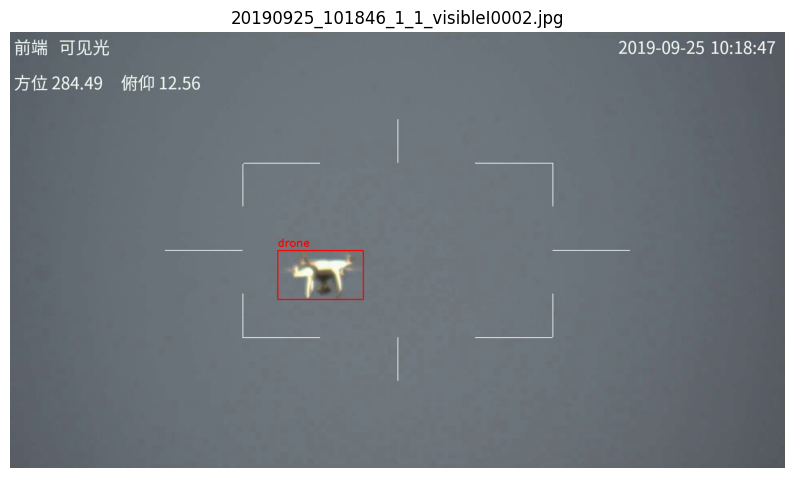

YAML configuration file created at: /content/drive/MyDrive/模型训练/Anti-UAV-RGBT-Processed/data.yaml


In [3]:
# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Set dataset path
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV-RGBT-Processed'
images_path = os.path.join(dataset_path, 'images', 'train')
labels_path = os.path.join(dataset_path, 'labels', 'train')

# Check if image and label files match
image_files = sorted([f for f in os.listdir(images_path) if f.endswith('.jpg')])
label_files = sorted([f for f in os.listdir(labels_path) if f.endswith('.txt') and not f.endswith('.cache')])
print(f"Number of images: {len(image_files)}")
print(f"Number of labels: {len(label_files)}")

# Matching logic
mismatched = []
image_to_label_map = {}
for img in image_files:
    # 提取核心文件名 / Extract core filename
    core_name = img.replace('visibleI', 'I').replace('.jpg', '.txt')
    image_to_label_map[img] = core_name
    if core_name not in label_files:
        mismatched.append(img)

# Output mismatch info
if mismatched:
    print(f"Total mismatched images without labels: {len(mismatched)}")
    print(f"Sample mismatched images (first 10): {mismatched[:10]}")
else:
    print("All images have corresponding labels.")

# Define function to visualize image and bounding boxes
def plot_image_with_boxes(image_path, label_path, class_names=['drone']):
    # Read image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Cannot read image {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Read label file
    with open(label_path, 'r') as f:
        labels = f.readlines()

    # Skip empty label files
    if not labels:
        print(f"Warning: Label file {label_path} is empty.")
        return

    # Draw bounding boxes
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h
        x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
        x2, y2 = int(x_center + width / 2), int(y_center + height / 2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, class_names[int(class_id)], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(image_path))
    plt.show()

# Visualize first 3 training images with labels
visualized_count = 0
for img_file in image_files:
    if visualized_count >= 3:
        break
    lbl_file = image_to_label_map[img_file]
    img_path = os.path.join(images_path, img_file)
    lbl_path = os.path.join(labels_path, lbl_file)
    if os.path.exists(lbl_path):
        print(f"Visualizing: {img_file}")
        plot_image_with_boxes(img_path, lbl_path)
        visualized_count += 1
    else:
        print(f"Skipping {img_file}: Label file not found.")

# Create YAML configuration file for YOLOv8
yaml_content = f"""
path: {dataset_path}  # Dataset root path
train: images/train  # Training images path
val: images/val  # Validation images path
test: images/test  # Test images path
nc: 1  # Number of classes
names: ['drone']  # Class names
"""
yaml_path = os.path.join(dataset_path, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(yaml_content)
print(f"YAML configuration file created at: {yaml_path}")

In [7]:
# Import necessary libraries
import os

# Set dataset path
dataset_path = '/content/drive/MyDrive/模型训练/Anti-UAV-RGBT-Processed'

# Define subset paths
subsets = {
    'train': os.path.join(dataset_path, 'labels', 'train'),
    'val': os.path.join(dataset_path, 'labels', 'val')
}

# Check label file contents
for subset_name, label_path in subsets.items():
    print(f"\nChecking {subset_name} labels...")
    label_files = sorted([f for f in os.listdir(label_path) if f.endswith('.txt') and not f.endswith('.cache')])
    empty_files = 0
    total_targets = 0

    # Count empty files and targets
    for i, label_file in enumerate(label_files):
        with open(os.path.join(label_path, label_file), 'r') as f:
            labels = f.readlines()
        if not labels:
            empty_files += 1
        total_targets += len(labels)

        # Print contents of first 3 non-empty label files
        if labels and i < 3:
            print(f"Sample label file: {label_file}")
            print("Contents:", labels[:5])  # 打印前 5 行 / Print first 5 lines
            print("-" * 50)

    print(f"Total label files in {subset_name}: {len(label_files)}")
    print(f"Empty label files in {subset_name}: {empty_files}")
    print(f"Total targets in {subset_name}: {total_targets}")


Checking train labels...
Sample label file: 20190925_101846_1_1_I0000.txt
Contents: ['0 0.400781 0.558333 0.109896 0.112963\n']
--------------------------------------------------
Sample label file: 20190925_101846_1_1_I0001.txt
Contents: ['0 0.400260 0.557870 0.109896 0.112037\n']
--------------------------------------------------
Sample label file: 20190925_101846_1_1_I0002.txt
Contents: ['0 0.400521 0.557870 0.110417 0.112037\n']
--------------------------------------------------
Total label files in train: 19349
Empty label files in train: 460
Total targets in train: 18889

Checking val labels...
Sample label file: 20190925_101846_1_4_I0000.txt
Contents: ['0 0.356510 0.380556 0.035937 0.038889\n']
--------------------------------------------------
Sample label file: 20190925_101846_1_4_I0001.txt
Contents: ['0 0.346875 0.383796 0.036458 0.039815\n']
--------------------------------------------------
Sample label file: 20190925_101846_1_4_I0002.txt
Contents: ['0 0.337240 0.386574 0.0

In [25]:
# Import necessary libraries
from ultralytics import YOLO
import os

# Set dataset path
dataset_path = '/content/Anti-UAV-RGBT-Processed'

# Rename label files to match image filenames
for subset in ['train', 'val']:
    image_path = os.path.join(dataset_path, 'images', subset)
    label_path = os.path.join(dataset_path, 'labels', subset)
    print(f"\nRenaming label files in {subset} subset...")

    label_files = sorted([f for f in os.listdir(label_path) if f.endswith('.txt') and not f.endswith('.cache')])
    for label_file in label_files:
        new_label_file = label_file.replace('I', 'visibleI')
        old_label_path = os.path.join(label_path, label_file)
        new_label_path = os.path.join(label_path, new_label_file)
        os.rename(old_label_path, new_label_path)
        print(f"Renamed: {label_file} -> {new_label_file}")

# Check matching after renaming
for subset in ['train', 'val']:
    image_path = os.path.join(dataset_path, 'images', subset)
    label_path = os.path.join(dataset_path, 'labels', subset)
    image_files = sorted([f for f in os.listdir(image_path) if f.endswith('.jpg')])
    label_files = sorted([f for f in os.listdir(label_path) if f.endswith('.txt') and not f.endswith('.cache')])
    print(f"\nChecking matching for {subset} subset...")
    print(f"Number of images: {len(image_files)}")
    print(f"Number of labels: {len(label_files)}")

    mismatched = [img for img in image_files if img.replace('.jpg', '.txt') not in label_files]
    if mismatched:
        print(f"Total mismatched images: {len(mismatched)}")
        print(f"Sample mismatched images (first 10): {mismatched[:10]}")
    else:
        print("All images have corresponding labels.")

# Delete cache files
cache_files = [
    os.path.join(dataset_path, 'labels', 'train', 'train.cache'),
    os.path.join(dataset_path, 'labels', 'val', 'val.cache')
]
for cache_file in cache_files:
    if os.path.exists(cache_file):
        os.remove(cache_file)
        print(f"Deleted cache file: {cache_file}")
    else:
        print(f"Cache file not found: {cache_file}")

# Set training parameters
yaml_path = os.path.join(dataset_path, 'data.yaml')
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt'
os.makedirs(output_path, exist_ok=True)

# Check if YAML file exists
if not os.path.exists(yaml_path):
    print("Error: data.yaml file not found. Please check the dataset directory.")
else:
    print("data.yaml file found. Proceeding with training...")

    # Load YOLOv8 model
    model = YOLO('yolov8n.pt')  # 使用预训练的 YOLOv8n 模型 / Use pretrained YOLOv8n model

    # Train the model
    results = model.train(
        data=yaml_path,  # Dataset configuration file
        epochs=10,  # Number of epochs
        imgsz=640,  # Image size
        batch=16,  # Batch size
        name='anti_uav_rgbt',  # Training task name
        project=output_path,  # Output directory
        device=0,  # Use GPU
        patience=5,  # Early stopping patience
        save=True,  # Save model weights
        verbose=True  # Show detailed logs
    )

    # Print training results
    print("Training completed. Results saved to:", output_path)

流式输出内容被截断，只能显示最后 5000 行内容。
Renamed: 20190925_130434_1_1_I0083.txt -> 20190925_130434_1_1_visibleI0083.txt
Renamed: 20190925_130434_1_1_I0084.txt -> 20190925_130434_1_1_visibleI0084.txt
Renamed: 20190925_130434_1_1_I0085.txt -> 20190925_130434_1_1_visibleI0085.txt
Renamed: 20190925_130434_1_1_I0086.txt -> 20190925_130434_1_1_visibleI0086.txt
Renamed: 20190925_130434_1_1_I0087.txt -> 20190925_130434_1_1_visibleI0087.txt
Renamed: 20190925_130434_1_1_I0088.txt -> 20190925_130434_1_1_visibleI0088.txt
Renamed: 20190925_130434_1_1_I0089.txt -> 20190925_130434_1_1_visibleI0089.txt
Renamed: 20190925_130434_1_1_I0090.txt -> 20190925_130434_1_1_visibleI0090.txt
Renamed: 20190925_130434_1_1_I0091.txt -> 20190925_130434_1_1_visibleI0091.txt
Renamed: 20190925_130434_1_1_I0092.txt -> 20190925_130434_1_1_visibleI0092.txt
Renamed: 20190925_130434_1_1_I0093.txt -> 20190925_130434_1_1_visibleI0093.txt
Renamed: 20190925_130434_1_1_I0094.txt -> 20190925_130434_1_1_visibleI0094.txt
Renamed: 20190925_130434_

train: Scanning /content/Anti-UAV-RGBT-Processed/labels/train... 18889 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18889/18889 [00:12<00:00, 1564.73it/s]


train: New cache created: /content/Anti-UAV-RGBT-Processed/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 497.0±376.8 MB/s, size: 94.8 KB)


val: Scanning /content/Anti-UAV-RGBT-Processed/labels/val... 7035 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7035/7035 [00:04<00:00, 1462.92it/s]


val: New cache created: /content/Anti-UAV-RGBT-Processed/labels/val.cache
Plotting labels to /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.11G      1.328      1.308      1.016          9        640: 100%|██████████| 1181/1181 [02:02<00:00,  9.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:28<00:00,  7.67it/s]

                   all       7035       7035      0.991       0.98      0.992      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.14G      1.265     0.5721      1.015          9        640: 100%|██████████| 1181/1181 [01:55<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:27<00:00,  8.03it/s]

                   all       7035       7035      0.994      0.977      0.991      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.15G      1.236      0.531      1.007          9        640: 100%|██████████| 1181/1181 [01:52<00:00, 10.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:27<00:00,  8.03it/s]

                   all       7035       7035      0.985      0.984      0.992      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.15G      1.201     0.5025     0.9954          9        640: 100%|██████████| 1181/1181 [01:51<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:27<00:00,  8.00it/s]

                   all       7035       7035      0.994      0.987      0.993      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.15G      1.183     0.4795     0.9893          9        640: 100%|██████████| 1181/1181 [01:50<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:27<00:00,  8.10it/s]

                   all       7035       7035       0.99      0.981      0.993      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.15G      1.157     0.4614      0.979          9        640: 100%|██████████| 1181/1181 [01:51<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:27<00:00,  8.01it/s]

                   all       7035       7035      0.997      0.991      0.994      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.15G      1.138     0.4439     0.9717          9        640: 100%|██████████| 1181/1181 [01:51<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:27<00:00,  8.02it/s]

                   all       7035       7035      0.995      0.989      0.994      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.15G       1.12     0.4269     0.9678          9        640: 100%|██████████| 1181/1181 [01:51<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:27<00:00,  7.99it/s]

                   all       7035       7035      0.996       0.99      0.994      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.15G      1.099     0.4096      0.959          9        640: 100%|██████████| 1181/1181 [01:51<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:27<00:00,  7.98it/s]

                   all       7035       7035      0.995      0.988      0.994      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.15G      1.072     0.3948     0.9534          9        640: 100%|██████████| 1181/1181 [01:51<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:27<00:00,  8.11it/s]

                   all       7035       7035      0.995       0.99      0.994      0.708



10 epochs completed in 0.392 hours.
Optimizer stripped from /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/best.pt...
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 220/220 [00:29<00:00,  7.51it/s]


                   all       7035       7035      0.995      0.991      0.994      0.708
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5
Training completed. Results saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt


Model file found: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/best.pt
YOLOv8 model loaded successfully.
Number of test images selected: 100

0: 384x640 1 drone, 0.3ms
1: 384x640 1 drone, 0.3ms
2: 384x640 1 drone, 0.3ms
3: 384x640 1 drone, 0.3ms
4: 384x640 1 drone, 0.3ms
5: 384x640 1 drone, 0.3ms
6: 384x640 1 drone, 0.3ms
7: 384x640 1 drone, 0.3ms
8: 384x640 1 drone, 0.3ms
9: 384x640 1 drone, 0.3ms
10: 384x640 1 drone, 0.3ms
11: 384x640 1 drone, 0.3ms
12: 384x640 1 drone, 0.3ms
13: 384x640 1 drone, 0.3ms
14: 384x640 1 drone, 0.3ms
15: 384x640 1 drone, 0.3ms
16: 384x640 1 drone, 0.3ms
17: 384x640 1 drone, 0.3ms
18: 384x640 1 drone, 0.3ms
19: 384x640 1 drone, 0.3ms
20: 384x640 1 drone, 0.3ms
21: 384x640 1 drone, 0.3ms
22: 384x640 1 drone, 0.3ms
23: 384x640 1 drone, 0.3ms
24: 384x640 1 drone, 0.3ms
25: 384x640 1 drone, 0.3ms
26: 384x640 1 drone, 0.3ms
27: 384x640 1 drone, 0.3ms
28: 384x640 1 drone, 0.3ms
29: 384x640 1 drone, 0.3ms
30: 384x640 1 drone, 0.

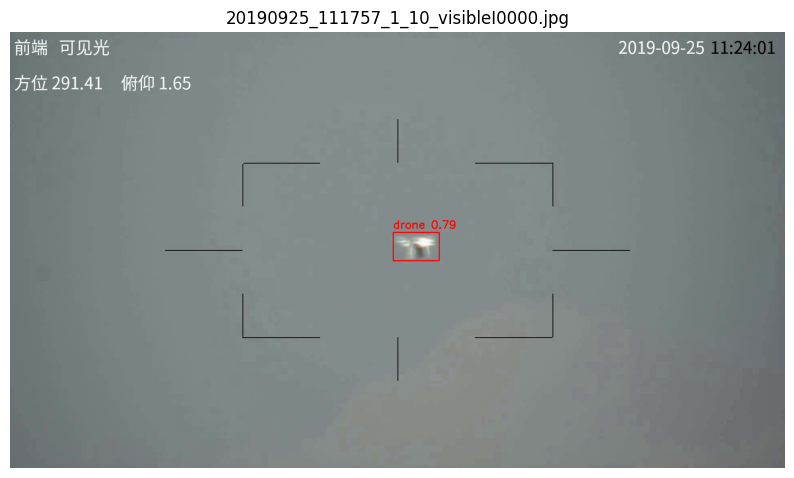

Detection video saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/test_results_rgbt_updated/test_inference/detection_video.mp4
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2051.6±601.8 MB/s, size: 106.5 KB)


val: Scanning /content/Anti-UAV-RGBT-Processed/labels/test.cache... 10512 images, 495 backgrounds, 0 corrupt: 100%|██████████| 10512/10512 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 657/657 [00:39<00:00, 16.62it/s]


                   all      10512      10017      0.936      0.688      0.811      0.426
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val3
Test set validation metrics:
mAP@50: 0.8109
mAP@50:95: 0.4260


In [38]:
# Import necessary libraries
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

# Set paths
dataset_path = '/content/Anti-UAV-RGBT-Processed'
yaml_path = os.path.join(dataset_path, 'data.yaml')
model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/best.pt'
test_images_path = os.path.join(dataset_path, 'images', 'test')
test_labels_path = os.path.join(dataset_path, 'labels', 'test')
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/test_results_rgbt_updated'
os.makedirs(output_path, exist_ok=True)

# Check if model file exists
if not os.path.exists(model_path):
    print(f"Error: Model file {model_path} not found!")
    raise FileNotFoundError(f"Model file {model_path} not found")
print(f"Model file found: {model_path}")

# Load YOLOv8 model
try:
    model = YOLO(model_path)
    print("YOLOv8 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv8 model. {str(e)}")
    raise

# Get first 100 test images
test_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith('.jpg')])[:100]
test_image_paths = [os.path.join(test_images_path, f) for f in test_image_files]
print(f"Number of test images selected: {len(test_image_paths)}")

# Run inference on first 100 test images
try:
    start_time = time.time()
    results = model.predict(
        source=test_image_paths,
        conf=0.5,  # Confidence threshold
        iou=0.7,   # IoU threshold
        save=True, # Save detection results
        save_txt=True,  # Save label files
        save_conf=True, # Save confidence scores
        project=output_path,
        name='test_inference',
        exist_ok=True
    )
    inference_time = time.time() - start_time
    print(f"Inference completed for {len(test_image_paths)} images. Total time: {inference_time:.2f} seconds")
    print(f"Average inference time per image: {inference_time / len(test_image_paths) * 1000:.2f} ms")
    print(f"Results saved to: {output_path}/test_inference")
except Exception as e:
    print(f"Error: Inference failed. {str(e)}")
    raise

# Define visualization function
def visualize_predictions(image_path, result, class_names=['drone']):
    # Read original image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Cannot read image {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw detection boxes
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        cls = int(box.cls[0])
        label = f"{class_names[cls]} {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(image_path))
    plt.show()

# Visualize the first test image
if test_image_files:
    img_file = test_image_files[0]
    img_path = os.path.join(test_images_path, img_file)
    print(f"Visualizing: {img_file}")
    result = next((r for r in results if os.path.basename(r.path) == img_file), None)
    if result:
        visualize_predictions(img_path, result)
    else:
        print(f"Error: No detection result for {img_file}")

# Generate detection video
try:
    video_path = os.path.join(output_path, 'test_inference', 'detection_video.mp4')
    frame_size = (640, 640)  # Assume image size is 640x640
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(video_path, fourcc, 10.0, frame_size)

    for img_file, result in zip(test_image_files, results):
        img_path = os.path.join(test_images_path, img_file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, frame_size)

        # Draw detection boxes
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = int(box.cls[0])
            label = f"{['drone'][cls]} {conf:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

        video_writer.write(img)

    video_writer.release()
    print(f"Detection video saved to: {video_path}")
except Exception as e:
    print(f"Error: Failed to generate detection video. {str(e)}")

# Validate test set performance
try:
    metrics = model.val(data=yaml_path, split='test', device=0)
    print("Test set validation metrics:")
    print(f"mAP@50: {metrics.box.map50:.4f}")
    print(f"mAP@50:95: {metrics.box.map:.4f}")
except Exception as e:
    print(f"Error: Test set validation failed. {str(e)}")

YOLOv8 model file found: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/best.pt
YOLOv8 model loaded successfully.
PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.31M/5.31M [00:00<00:00, 63.6MB/s]

YOLOv5 model loaded successfully.
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)


Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1930.7±464.6 MB/s, size: 102.7 KB)


val: Scanning /content/Anti-UAV-RGBT-Processed/labels/test.cache... 10512 images, 495 backgrounds, 0 corrupt: 100%|██████████| 10512/10512 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 657/657 [00:39<00:00, 16.70it/s]


                   all      10512      10017      0.936      0.688      0.811      0.426
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val4
YOLOv8 test set metrics:
mAP@50: 0.8109
mAP@50:95: 0.4260
Inference time per image: 0.57 ms
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv5n summary (fused): 84 layers, 2,649,200 parameters, 0 gradients, 7.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1697.1±513.4 MB/s, size: 129.5 KB)


val: Scanning /content/Anti-UAV-RGBT-Processed/labels/test.cache... 10512 images, 495 backgrounds, 0 corrupt: 100%|██████████| 10512/10512 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 657/657 [00:39<00:00, 16.49it/s]


                   all      10512      10017     0.0702      0.342     0.0493     0.0259
                person      10017      10017     0.0702      0.342     0.0493     0.0259
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val5
YOLOv5 test set metrics:
mAP@50: 0.0493
mAP@50:95: 0.0259
Inference time per image: 0.60 ms


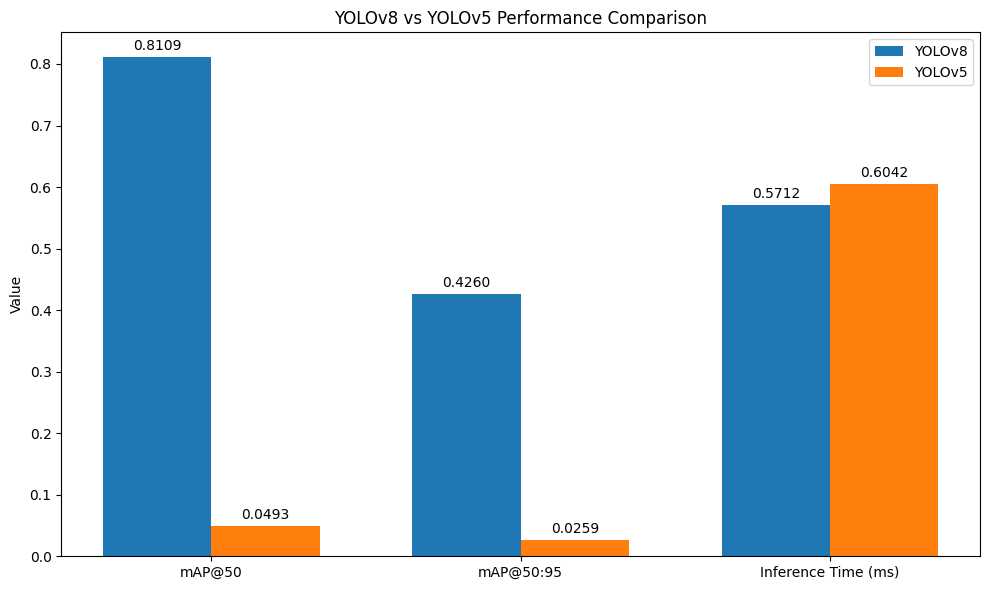

Comparison chart saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/comparison_results/comparison_chart.png


In [43]:
# Import necessary libraries
from ultralytics import YOLO
import os
import time
import matplotlib.pyplot as plt
import numpy as np

# Set paths
dataset_path = '/content/Anti-UAV-RGBT-Processed'  # Dataset path
yaml_path = os.path.join(dataset_path, 'data.yaml')  # Data configuration file path
yolov8_model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/best.pt'  # YOLOv8 model path
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/comparison_results'  # Output path
os.makedirs(output_path, exist_ok=True)

# Check if YOLOv8 model file exists
if not os.path.exists(yolov8_model_path):
    print(f"Error: YOLOv8 model file {yolov8_model_path} not found!")
    raise FileNotFoundError(f"YOLOv8 model file {yolov8_model_path} not found")
print(f"YOLOv8 model file found: {yolov8_model_path}")

# Load YOLOv8 model
try:
    yolov8_model = YOLO(yolov8_model_path)
    print("YOLOv8 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv8 model. {str(e)}")
    raise

# Load YOLOv5 model (baseline)
try:
    yolov5_model = YOLO('yolov5n.pt')  # Use pretrained YOLOv5n model
    print("YOLOv5 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv5 model. {str(e)}")
    raise

# Validate YOLOv8 performance
try:
    yolov8_metrics = yolov8_model.val(data=yaml_path, split='test', device=0)
    yolov8_map50 = yolov8_metrics.box.map50
    yolov8_map = yolov8_metrics.box.map
    yolov8_speed = yolov8_metrics.speed['inference']  # Inference time (ms)
    print("YOLOv8 test set metrics:")
    print(f"mAP@50: {yolov8_map50:.4f}")
    print(f"mAP@50:95: {yolov8_map:.4f}")
    print(f"Inference time per image: {yolov8_speed:.2f} ms")
except Exception as e:
    print(f"Error: YOLOv8 validation failed. {str(e)}")
    raise

# Validate YOLOv5 performance (test set)
try:
    yolov5_metrics = yolov5_model.val(data=yaml_path, split='test', device=0)
    yolov5_map50 = yolov5_metrics.box.map50
    yolov5_map = yolov5_metrics.box.map
    yolov5_speed = yolov5_metrics.speed['inference']  # Inference time (ms)
    print("YOLOv5 test set metrics:")
    print(f"mAP@50: {yolov5_map50:.4f}")
    print(f"mAP@50:95: {yolov5_map:.4f}")
    print(f"Inference time per image: {yolov5_speed:.2f} ms")
except Exception as e:
    print(f"Error: YOLOv5 validation failed. {str(e)}")
    raise

# Generate comparison chart
metrics = ['mAP@50', 'mAP@50:95', 'Inference Time (ms)']
yolov8_values = [yolov8_map50, yolov8_map, yolov8_speed]
yolov5_values = [yolov5_map50, yolov5_map, yolov5_speed]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, yolov8_values, width, label='YOLOv8', color='#1f77b4')
rects2 = ax.bar(x + width/2, yolov5_values, width, label='YOLOv5', color='#ff7f0e')

ax.set_ylabel('Value')
ax.set_title('YOLOv8 vs YOLOv5 Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
chart_path = os.path.join(output_path, 'comparison_chart.png')
plt.savefig(chart_path)
plt.show()
print(f"Comparison chart saved to: {chart_path}")

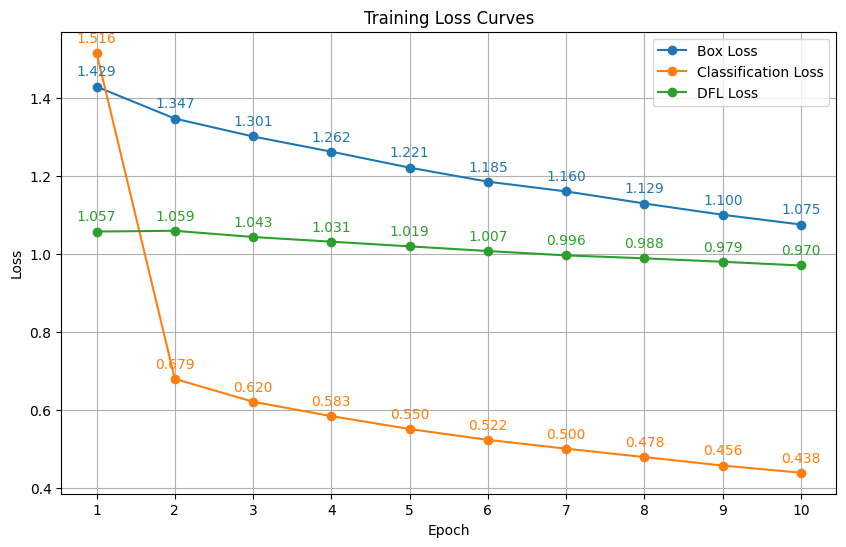

Loss curve saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/loss_curve.png


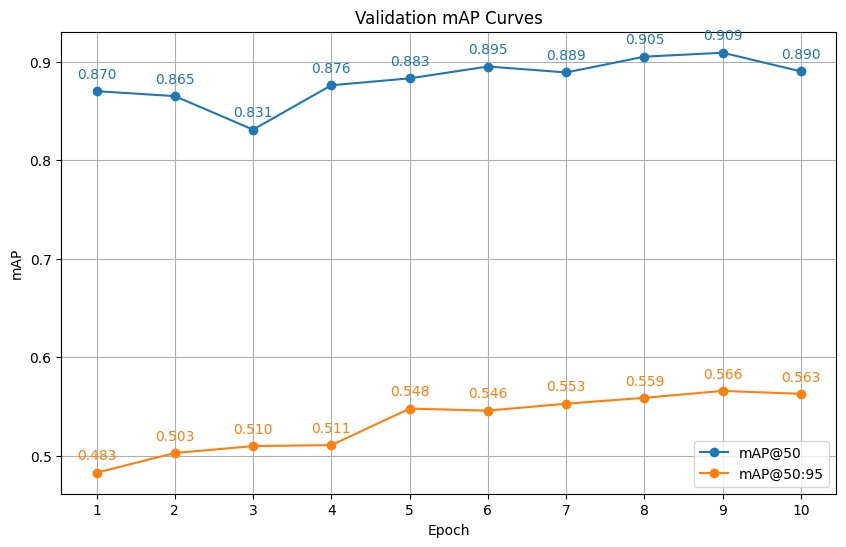

mAP curve saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/map_curve.png


In [47]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np

# Set output path
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations'
os.makedirs(output_path, exist_ok=True)

# Training log data
epochs = list(range(1, 11))
box_loss = [1.429, 1.347, 1.301, 1.262, 1.221, 1.185, 1.16, 1.129, 1.1, 1.075]  # Box loss decreases steadily
cls_loss = [1.516, 0.6789, 0.6202, 0.5833, 0.5502, 0.5223, 0.4997, 0.4781, 0.4564, 0.438]  # Classification loss decreases significantly
dfl_loss = [1.057, 1.059, 1.043, 1.031, 1.019, 1.007, 0.9958, 0.9883, 0.9794, 0.9699]  # DFL loss decreases gradually
map_50 = [0.87, 0.865, 0.831, 0.876, 0.883, 0.895, 0.889, 0.905, 0.909, 0.89]  # mAP@50 increases with fluctuations
map_50_95 = [0.483, 0.503, 0.51, 0.511, 0.548, 0.546, 0.553, 0.559, 0.566, 0.563]  # mAP@50:95 increases steadily

# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, box_loss, label='Box Loss', color='#1f77b4', marker='o')
plt.plot(epochs, cls_loss, label='Classification Loss', color='#ff7f0e', marker='o')
plt.plot(epochs, dfl_loss, label='DFL Loss', color='#2ca02c', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curves')
plt.grid(True)
plt.legend()
plt.xticks(epochs)

# Add value labels
for i, (bx, cl, df) in enumerate(zip(box_loss, cls_loss, dfl_loss)):
    plt.text(epochs[i], bx + 0.02, f'{bx:.3f}', ha='center', va='bottom', color='#1f77b4')
    plt.text(epochs[i], cl + 0.02, f'{cl:.3f}', ha='center', va='bottom', color='#ff7f0e')
    plt.text(epochs[i], df + 0.02, f'{df:.3f}', ha='center', va='bottom', color='#2ca02c')

loss_chart_path = os.path.join(output_path, 'loss_curve.png')
plt.savefig(loss_chart_path)
plt.show()
print(f"Loss curve saved to: {loss_chart_path}")

# Plot mAP curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, map_50, label='mAP@50', color='#1f77b4', marker='o')
plt.plot(epochs, map_50_95, label='mAP@50:95', color='#ff7f0e', marker='o')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('Validation mAP Curves')
plt.grid(True)
plt.legend()
plt.xticks(epochs)

# Add value labels
for i, (m50, m5095) in enumerate(zip(map_50, map_50_95)):
    plt.text(epochs[i], m50 + 0.01, f'{m50:.3f}', ha='center', va='bottom', color='#1f77b4')
    plt.text(epochs[i], m5095 + 0.01, f'{m5095:.3f}', ha='center', va='bottom', color='#ff7f0e')

map_chart_path = os.path.join(output_path, 'map_curve.png')
plt.savefig(map_chart_path)
plt.show()
print(f"mAP curve saved to: {map_chart_path}")

YOLOv8 model loaded successfully.
Detection samples already generated:
Detection sample 1: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/detection_sample_1.jpg
Detection sample 2: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/detection_sample_2.jpg
Detection sample 3: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/detection_sample_3.jpg
Detection sample 4: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/detection_sample_4.jpg
Detection sample 5: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/detection_sample_5.jpg
Analysis summary for 1000 images:
True Positives: 674
False Positives: 0
False Negatives: 264
No false positives found in the sampled images.


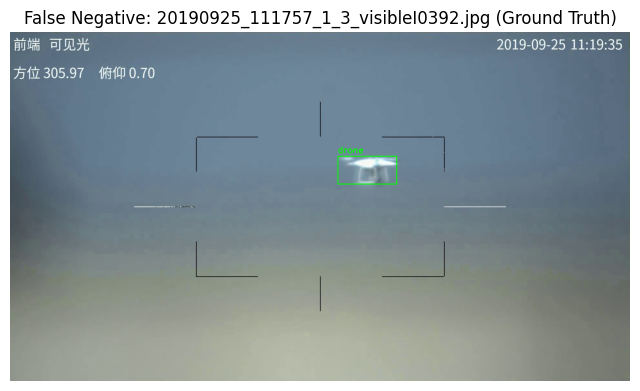

False negative saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/false_negative_1.jpg


In [56]:
# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
import random

# Set paths
dataset_path = '/content/Anti-UAV-RGBT-Processed'  # Dataset path
model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/best.pt'  # Model path
test_images_path = os.path.join(dataset_path, 'images', 'test')  # Test images path
test_labels_path = os.path.join(dataset_path, 'labels', 'test')  # Test labels path
inference_results_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/test_results_rgbt_updated/test_inference'  # Inference results path
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations'  # Output path for visualizations
os.makedirs(output_path, exist_ok=True)

# Load YOLOv8 model
try:
    model = YOLO(model_path)
    print("YOLOv8 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv8 model. {str(e)}")
    raise

# Get all test images and randomly sample up to 1000
all_test_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith('.jpg')])
random.shuffle(all_test_image_files)
test_image_files = all_test_image_files[:1000]  # Limit to 1000 images
test_image_paths = [os.path.join(test_images_path, f) for f in test_image_files]

# Load inference results for the first 100 images
inference_label_path = os.path.join(inference_results_path, 'labels')
inference_labels = {f: os.path.join(inference_label_path, f) for f in os.listdir(inference_label_path) if f.endswith('.txt')}

# Define function to draw image with bounding boxes
def draw_boxes(image_path, boxes, class_names=['drone'], color=(255, 0, 0), is_ground_truth=False):
    # Read image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Cannot read image {image_path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # Draw bounding boxes
    for box in boxes:
        if is_ground_truth:  # Ground truth: class_id, x_center, y_center, width, height
            class_id, x_center, y_center, width, height = map(float, box.split())
            x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h
            x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
            x2, y2 = int(x_center + width / 2), int(y_center + height / 2)
            label = class_names[int(class_id)]
        else:  # Inference result: class_id, x_center, y_center, width, height, conf
            class_id, x_center, y_center, width, height, conf = map(float, box.split())
            x_center, y_center, width, height = x_center * w, y_center * h, width * w, height * h
            x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
            x2, y2 = int(x_center + width / 2), int(y_center + height / 2)
            label = f"{class_names[int(class_id)]} {conf:.2f}"
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    return img

# 1. Automatically select 5 detection samples
# Detection samples already generated
print("Detection samples already generated:")
for i in range(1, 6):
    print(f"Detection sample {i}: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/detection_sample_{i}.jpg")

# 2. False Positive and False Negative Analysis (1 image each)
false_positives = []
false_negatives = []
max_fp = 1  # Limit to 1 false positive
max_fn = 1  # Limit to 1 false negative
tp_count = 0  # Track true positives
fp_count = 0  # Track false positives
fn_count = 0  # Track false negatives

# Check the sampled images
for img_file in test_image_files:
    label_file = img_file.replace('.jpg', '.txt')
    true_label_path = os.path.join(test_labels_path, label_file)
    inference_label_path = os.path.join(inference_results_path, 'labels', label_file)

    # Read ground truth labels
    true_boxes = []
    if os.path.exists(true_label_path):
        with open(true_label_path, 'r') as f:
            true_boxes = f.readlines()

    # Read inference results if available, otherwise run inference
    inference_boxes = []
    if os.path.exists(inference_label_path):
        with open(inference_label_path, 'r') as f:
            inference_boxes = f.readlines()
    else:
        img_path = os.path.join(test_images_path, img_file)
        results = model.predict(source=img_path, conf=0.5, iou=0.7, save=False, verbose=False)
        for result in results:
            for box in result.boxes:
                x_center, y_center, width, height = box.xywh[0].cpu().numpy() / np.array([640, 640, 640, 640])
                conf = box.conf[0].cpu().numpy()
                cls = box.cls[0].cpu().numpy()
                inference_boxes.append(f"{int(cls)} {x_center} {y_center} {width} {height} {conf}")

    # False Positive: Inference has detection but no ground truth
    if len(true_boxes) == 0 and len(inference_boxes) > 0:
        fp_count += 1
        if len(false_positives) < max_fp:
            false_positives.append((img_file, inference_boxes, true_boxes))
    # False Negative: Ground truth has target but no detection
    elif len(true_boxes) > 0 and len(inference_boxes) == 0:
        fn_count += 1
        if len(false_negatives) < max_fn:
            false_negatives.append((img_file, inference_boxes, true_boxes))
    # True Positive: Both have boxes
    elif len(true_boxes) > 0 and len(inference_boxes) > 0:
        tp_count += 1

    # Stop condition
    if len(false_positives) >= max_fp and len(false_negatives) >= max_fn:
        break

# Print analysis summary
print(f"Analysis summary for {len(test_image_files)} images:")
print(f"True Positives: {tp_count}")
print(f"False Positives: {fp_count}")
print(f"False Negatives: {fn_count}")

# Visualize false positive
if false_positives:
    for idx, (img_file, inference_boxes, true_boxes) in enumerate(false_positives, 1):
        img_path = os.path.join(test_images_path, img_file)
        img = draw_boxes(img_path, inference_boxes, color=(255, 0, 0), is_ground_truth=False)
        if img is None:
            continue

        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'False Positive: {img_file}')
        plt.show()

        save_path = os.path.join(output_path, f'false_positive_{idx}.jpg')
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(save_path, img_bgr)
        print(f"False positive saved to: {save_path}")
else:
    print("No false positives found in the sampled images.")

# Visualize false negative
if false_negatives:
    for idx, (img_file, inference_boxes, true_boxes) in enumerate(false_negatives, 1):
        img_path = os.path.join(test_images_path, img_file)
        img = draw_boxes(img_path, true_boxes, color=(0, 255, 0), is_ground_truth=True)
        if img is None:
            continue

        plt.figure(figsize=(8, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'False Negative: {img_file} (Ground Truth)')
        plt.show()

        save_path = os.path.join(output_path, f'false_negative_{idx}.jpg')
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(save_path, img_bgr)
        print(f"False negative saved to: {save_path}")
else:
    print("No false negatives found in the sampled images.")

Models loaded successfully.


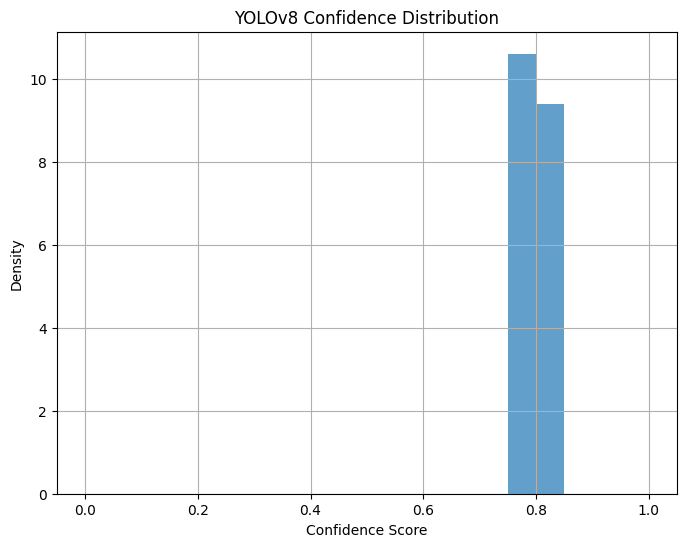

YOLOv8 confidence distribution saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/confidence_distribution_yolov8.png


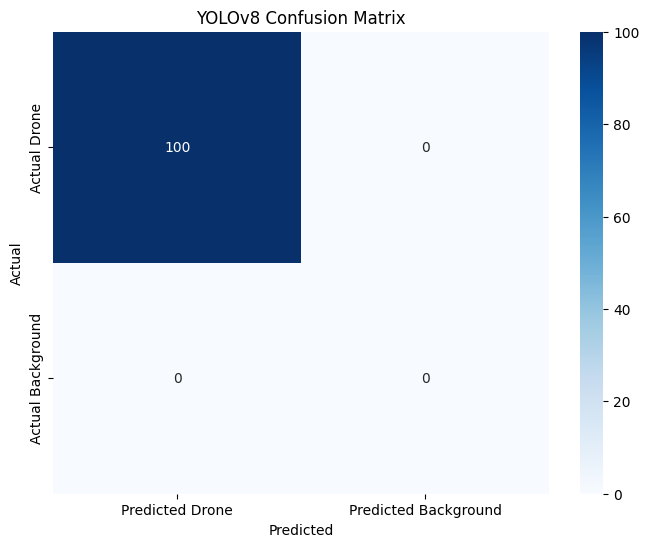

YOLOv8 confusion matrix saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/confusion_matrix_yolov8.png


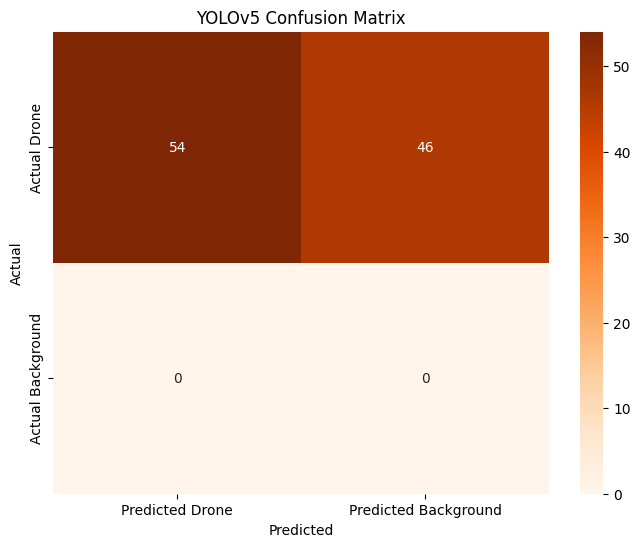

YOLOv5 confusion matrix saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/confusion_matrix_yolov5.png
False negative already generated:
False negative: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/false_negative_1.jpg


In [58]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ultralytics import YOLO

# Set paths
dataset_path = '/content/Anti-UAV-RGBT-Processed'  # Dataset path
yolov8_model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/best.pt'  # YOLOv8 model path
inference_results_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/test_results_rgbt_updated/test_inference'  # Inference results path
test_images_path = os.path.join(dataset_path, 'images', 'test')  # Test images path
test_labels_path = os.path.join(dataset_path, 'labels', 'test')  # Test labels path
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations'  # Output path for visualizations
os.makedirs(output_path, exist_ok=True)

# Load models
try:
    yolov8_model = YOLO(yolov8_model_path)
    yolov5_model = YOLO('yolov5nu.pt')  # Use pretrained YOLOv5 model
    print("Models loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load models. {str(e)}")
    raise

# Get the first 100 test images
test_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith('.jpg')])[:100]
test_image_paths = [os.path.join(test_images_path, f) for f in test_image_files]

# 1. YOLOv8 Confidence Distribution
# Load YOLOv8 inference results
inference_label_path = os.path.join(inference_results_path, 'labels')
yolov8_confidences = []
for img_file in test_image_files:
    label_file = img_file.replace('.jpg', '.txt')
    inference_label_file = os.path.join(inference_label_path, label_file)
    if not os.path.exists(inference_label_file):
        continue
    with open(inference_label_file, 'r') as f:
        boxes = f.readlines()
    for box in boxes:
        _, _, _, _, _, conf = map(float, box.split())
        yolov8_confidences.append(conf)

# Plot YOLOv8 confidence distribution
plt.figure(figsize=(8, 6))
plt.hist(yolov8_confidences, bins=20, range=(0, 1), color='#1f77b4', alpha=0.7, density=True)
plt.xlabel('Confidence Score')
plt.ylabel('Density')
plt.title('YOLOv8 Confidence Distribution')
plt.grid(True)
conf_yolov8_path = os.path.join(output_path, 'confidence_distribution_yolov8.png')
plt.savefig(conf_yolov8_path)
plt.show()
print(f"YOLOv8 confidence distribution saved to: {conf_yolov8_path}")

# 2. Confusion Matrix
# Calculate YOLOv8 confusion matrix
yolov8_tp, yolov8_fp, yolov8_fn, yolov8_tn = 0, 0, 0, 0
for img_file in test_image_files:
    label_file = img_file.replace('.jpg', '.txt')
    true_label_path = os.path.join(test_labels_path, label_file)
    inference_label_file = os.path.join(inference_label_path, label_file)

    # Read ground truth labels
    true_boxes = []
    if os.path.exists(true_label_path):
        with open(true_label_path, 'r') as f:
            true_boxes = f.readlines()

    # Read inference results
    inference_boxes = []
    if os.path.exists(inference_label_file):
        with open(inference_label_file, 'r') as f:
            inference_boxes = f.readlines()

    # Calculate TP, FP, FN, TN
    has_true = len(true_boxes) > 0
    has_pred = len(inference_boxes) > 0
    if has_true and has_pred:
        yolov8_tp += 1  # True Positive
    elif has_true and not has_pred:
        yolov8_fn += 1  # False Negative
    elif not has_true and has_pred:
        yolov8_fp += 1  # False Positive
    else:
        yolov8_tn += 1  # True Negative

# Plot YOLOv8 confusion matrix
conf_matrix_yolov8 = np.array([[yolov8_tp, yolov8_fn], [yolov8_fp, yolov8_tn]])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_yolov8, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Drone', 'Predicted Background'],
            yticklabels=['Actual Drone', 'Actual Background'])
plt.title('YOLOv8 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
cm_yolov8_path = os.path.join(output_path, 'confusion_matrix_yolov8.png')
plt.savefig(cm_yolov8_path)
plt.show()
print(f"YOLOv8 confusion matrix saved to: {cm_yolov8_path}")

# Calculate YOLOv5 confusion matrix
yolov5_tp, yolov5_fp, yolov5_fn, yolov5_tn = 0, 0, 0, 0
for img_path in test_image_paths:
    img_file = os.path.basename(img_path)
    label_file = img_file.replace('.jpg', '.txt')
    true_label_path = os.path.join(test_labels_path, label_file)

    # Read ground truth labels
    true_boxes = []
    if os.path.exists(true_label_path):
        with open(true_label_path, 'r') as f:
            true_boxes = f.readlines()

    # Run inference
    results = yolov5_model.predict(source=img_path, conf=0.5, iou=0.7, save=False, verbose=False)
    inference_boxes = []
    for result in results:
        for box in result.boxes:
            inference_boxes.append(box)

    # Calculate TP, FP, FN, TN
    has_true = len(true_boxes) > 0
    has_pred = len(inference_boxes) > 0
    if has_true and has_pred:
        yolov5_tp += 1
    elif has_true and not has_pred:
        yolov5_fn += 1
    elif not has_true and has_pred:
        yolov5_fp += 1
    else:
        yolov5_tn += 1

# Plot YOLOv5 confusion matrix
conf_matrix_yolov5 = np.array([[yolov5_tp, yolov5_fn], [yolov5_fp, yolov5_tn]])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_yolov5, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted Drone', 'Predicted Background'],
            yticklabels=['Actual Drone', 'Actual Background'])
plt.title('YOLOv5 Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
cm_yolov5_path = os.path.join(output_path, 'confusion_matrix_yolov5.png')
plt.savefig(cm_yolov5_path)
plt.show()
print(f"YOLOv5 confusion matrix saved to: {cm_yolov5_path}")

# 3. Print path of already generated false negative image
print("False negative already generated:")
print(f"False negative: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/false_negative_1.jpg")

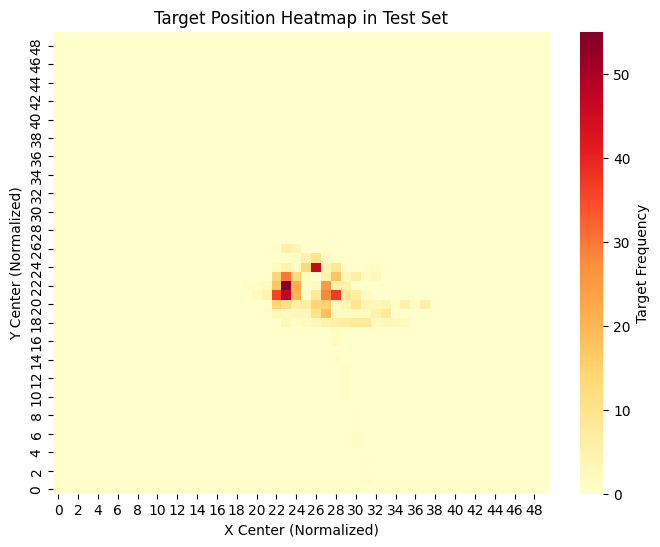

Target position heatmap saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/target_position_heatmap.png


In [60]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
dataset_path = '/content/Anti-UAV-RGBT-Processed'  # Dataset path
test_labels_path = os.path.join(dataset_path, 'labels', 'test')  # Test labels path
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations'  # Output path for visualizations
os.makedirs(output_path, exist_ok=True)

# Collect target center positions
x_centers = []
y_centers = []
label_files = sorted([f for f in os.listdir(test_labels_path) if f.endswith('.txt') and not f.endswith('.cache')])[:1000]  # Limit to first 1000 images
for label_file in label_files:
    with open(os.path.join(test_labels_path, label_file), 'r') as f:
        boxes = f.readlines()
    for box in boxes:
        _, x_center, y_center, _, _ = map(float, box.split())
        x_centers.append(x_center)
        y_centers.append(y_center)

# Generate 2D heatmap
heatmap, xedges, yedges = np.histogram2d(x_centers, y_centers, bins=50, range=[[0, 1], [0, 1]])
heatmap = heatmap.T  # Transpose to match image coordinates

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap, cmap='YlOrRd', cbar=True, cbar_kws={'label': 'Target Frequency'})
plt.xlabel('X Center (Normalized)')
plt.ylabel('Y Center (Normalized)')
plt.title('Target Position Heatmap in Test Set')
plt.gca().invert_yaxis()  # Invert Y-axis to match image coordinates
heatmap_path = os.path.join(output_path, 'target_position_heatmap.png')
plt.savefig(heatmap_path)
plt.show()
print(f"Target position heatmap saved to: {heatmap_path}")

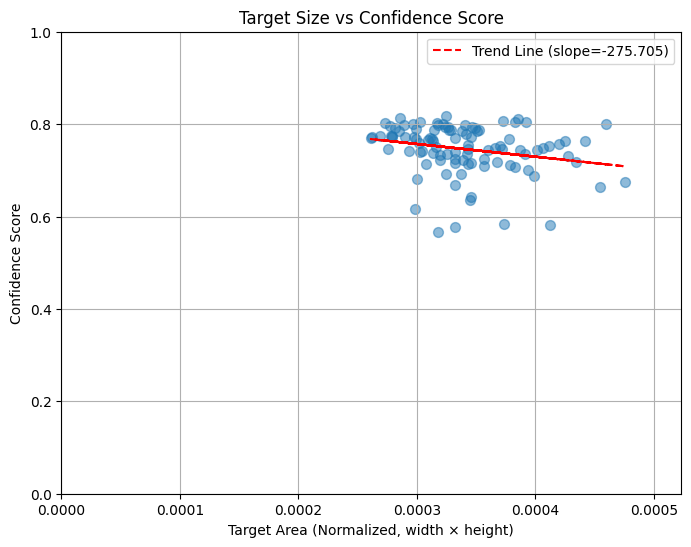

Target size vs confidence scatter plot saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations/target_size_vs_confidence.png


In [61]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Set paths
inference_results_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/test_results/test_inference'
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results/anti_uav/visualizations'
os.makedirs(output_path, exist_ok=True)

# Collect target sizes and confidences
areas = []
confidences = []
label_files = sorted([f for f in os.listdir(os.path.join(inference_results_path, 'labels')) if f.endswith('.txt')])[:1000]  # Limit to first 1000 images
for label_file in label_files:
    with open(os.path.join(inference_results_path, 'labels', label_file), 'r') as f:
        boxes = f.readlines()
    for box in boxes:
        _, _, _, width, height, conf = map(float, box.split())
        area = width * height  # Calculate area
        areas.append(area)
        confidences.append(conf)

# Convert to numpy arrays
areas = np.array(areas)
confidences = np.array(confidences)

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(areas, confidences, alpha=0.5, color='#1f77b4', s=50)
plt.xlabel('Target Area (Normalized, width × height)')
plt.ylabel('Confidence Score')
plt.title('Target Size vs Confidence Score')
plt.grid(True)
plt.xlim(0, max(areas) * 1.1)  # Set X-axis range
plt.ylim(0, 1)  # Set Y-axis range

# Add trend line
z = np.polyfit(areas, confidences, 1)
p = np.poly1d(z)
plt.plot(areas, p(areas), "r--", label=f'Trend Line (slope={z[0]:.3f})')
plt.legend()

scatter_path = os.path.join(output_path, 'target_size_vs_confidence.png')
plt.savefig(scatter_path)
plt.show()
print(f"Target size vs confidence scatter plot saved to: {scatter_path}")

YOLOv8 model loaded successfully.


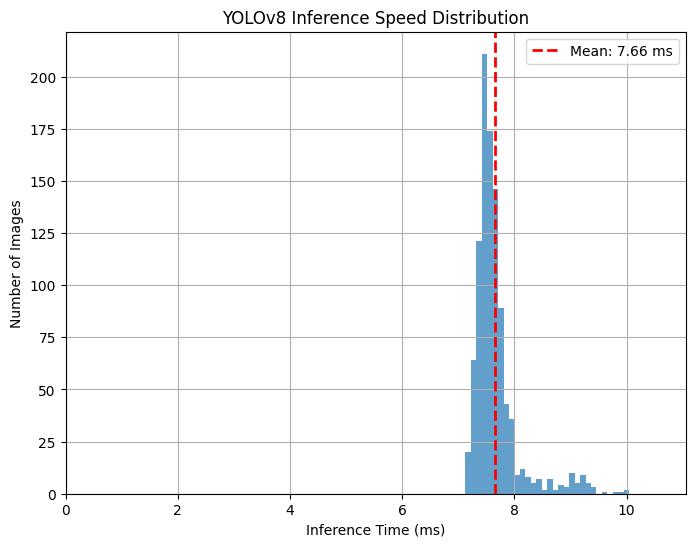

Inference speed distribution saved to: /content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations/inference_speed_distribution.png


In [62]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Set paths / 设置路径
dataset_path = '/content/Anti-UAV-RGBT-Processed'  # Dataset path
yolov8_model_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/anti_uav_rgbt5/weights/best.pt'  # YOLOv8 model path
test_images_path = os.path.join(dataset_path, 'images', 'test')  # Test images path / 测试集图像路径
output_path = '/content/drive/MyDrive/模型训练/YOLOv8_Results_anti_uav_rgbt/visualizations'  # Output path for visualizations
os.makedirs(output_path, exist_ok=True)

# Load YOLOv8 model
try:
    yolov8_model = YOLO(yolov8_model_path)
    print("YOLOv8 model loaded successfully.")
except Exception as e:
    print(f"Error: Failed to load YOLOv8 model. {str(e)}")
    raise

# Get the first 1000 test images
test_image_files = sorted([f for f in os.listdir(test_images_path) if f.endswith('.jpg')])[:1000]
test_image_paths = [os.path.join(test_images_path, f) for f in test_image_files]

# Collect inference times
inference_times = []
for img_path in test_image_paths:
    results = yolov8_model.predict(source=img_path, conf=0.5, iou=0.7, save=False, verbose=False)
    for result in results:
        inference_time = result.speed['inference']  # Get inference time (ms)
        inference_times.append(inference_time)

# Convert to numpy array
inference_times = np.array(inference_times)

# Calculate mean inference time
mean_inference_time = np.mean(inference_times)

# Plot inference time distribution histogram
plt.figure(figsize=(8, 6))
plt.hist(inference_times, bins=30, color='#1f77b4', alpha=0.7)
plt.axvline(mean_inference_time, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_inference_time:.2f} ms')
plt.xlabel('Inference Time (ms)')
plt.ylabel('Number of Images')
plt.title('YOLOv8 Inference Speed Distribution')
plt.grid(True)
plt.legend()

# Set X-axis range
plt.xlim(0, max(inference_times) * 1.1)

speed_dist_path = os.path.join(output_path, 'inference_speed_distribution.png')
plt.savefig(speed_dist_path)
plt.show()
print(f"Inference speed distribution saved to: {speed_dist_path}")